In [1]:
import pandas as pd

df = pd.read_csv('../dados/excertos_lematizados.csv', sep = '|')
df.head()

,COD,DESCR_AREA,EXCERTO_LEMATIZADO
0,1400,Responsabilidade,voto : cuidar o auto de tomada de conta especi...
1,1700,Finanças Públicas,voto : cuidar o auto de solicitação de o congr...
2,5700,Responsabilidade,relatório : tratar se de embargo de declaração...
3,284,Direito Processual,voto : XXSECAO em relação a outro processo jud...
4,298,Pessoal,voto : XXSECAO relativo a o ato envolver o sen...


In [2]:
textos = df['EXCERTO_LEMATIZADO'].values

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
vetorizador = TfidfVectorizer(token_pattern=r'\S+')
vetorizador.fit(textos)
print(len(vetorizador.vocabulary_))

26825


In [142]:
matriz = vetorizador.transform(textos)
matriz[0]

In [1]:
vetorizador.get_feature_names()[:50]

NameError: name 'vetorizador' is not defined

In [125]:
idfs = np.asarray(vetorizador.idf_)
ja_foi = []
i = 0
while (i < 20):
    valor = idfs.max()
    indice = idfs.argmax()
    idfs = np.delete(idfs, indice)
    word = vetorizador.get_feature_names()[indice]
    if word not in ja_foi:
        print (i, word, valor, indice)
        ja_foi.append(word)
        i += 1

0 *** 9.80131894766524 10
1 + 9.80131894766524 11
2 ; 9.80131894766524 18
3 < 9.80131894766524 19
4 > 9.80131894766524 23
5 [ 9.80131894766524 25
6 [sobrenome 9.80131894766524 31
7 [voto 9.80131894766524 33
8 \ 9.80131894766524 34
9 \pxxnumero 9.80131894766524 35
10 ] 9.80131894766524 36
11 ]a 9.80131894766524 37
12 ]acerca 9.80131894766524 38
13 ]acolho 9.80131894766524 39
14 ]acordam 9.80131894766524 40
15 ]ao 9.80131894766524 43
16 ]atende 9.80131894766524 46
17 ]com 9.80131894766524 48
18 ]conforme 9.80131894766524 49
19 ]contratoxxnumeracaoxxsalto 9.80131894766524 50


In [126]:
idfs = np.asarray(vetorizador.idf_)
ja_foi = []
i = 0
while (i < 20):
    valor = idfs.min()
    indice = idfs.argmin()
    idfs = np.delete(idfs, indice)
    word = vetorizador.get_feature_names()[indice]
    if word not in ja_foi:
        print (i, word, valor, indice)
        ja_foi.append(word)
        i += 1

0 de 1.0 6675
1 núpcias 1.0 17211
2 , 1.0002258270926832 13
3 elástico 1.0015064781396852 8801
4 / 1.0018834525475875 16
5 ]xxsalto 1.0051313121947882 99
6 quasexxnumeracao 1.0071002639857516 20190
7 - 1.0160088392920628 14
8 dória 1.0228389951567545 8453
9 pontão 1.0318118276350141 19025
10 acódão 1.0481054671211147 422
11 sepúlveda 1.0574683856349976 22492
12 nºsxxnumeracaoc 1.078738926524053 17184
13 xxquantia 1.0805320641795095 26519
14 panthéon 1.0921839560780586 17909
15 sd 1.0939187051810588 22116
16 coluviais 1.0983103102007934 4740
17 . 1.1045579876516702 15
18 volume 1.1479354017987382 25776
19 xxpercentualestende 1.1501194764012699 26508


In [98]:
matriz_densa = matriz.todense()
matriz_densa.shape

(13285, 26825)

In [99]:
matriz_densa[0]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [100]:
df_termos = pd.DataFrame(matriz_densa, columns = vetorizador.get_feature_names(), index = df.index)
df_termos.shape

(13285, 26825)

In [101]:
df_termos.head()

,!,$,$xxnumero,%,&,',(,),*,**,...,ø,último,úmida,único,únicosecretaria,únicoxxnumero,útil,—,—embora,•
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.010582,0.010372,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.055768,0.054658,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.086665,0.084940,0.0,0.0,...,0.0,0.055068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.053935,0.052861,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
df_termos.mean().sort_values(ascending=False)[:20]

o           0.556560
de          0.392032
,           0.292441
em          0.122906
a           0.086217
.           0.083620
que         0.073689
e           0.060898
por         0.051595
xxitem      0.042887
ser         0.038225
xxnumero    0.036249
xxsecao     0.033671
não         0.033569
se          0.031541
para        0.030319
com         0.029544
:           0.029071
artigo      0.025994
)           0.025557
dtype: float64

In [21]:
df_termos.mean().sort_values(ascending=True)[:20]

wildo                    5.996342e-07
dncxxnumeracao           5.996342e-07
leixxacordaorescreveu    5.996342e-07
osmane                   5.996342e-07
automotiva               5.996342e-07
protocolaram             5.996342e-07
xxacordaoerdeu           5.996342e-07
aeacconforme             5.996342e-07
tramitações              5.996342e-07
administrator            5.996342e-07
apoiadora                7.778798e-07
camareira                7.778798e-07
cologxxnumeracao         7.778798e-07
container                7.778798e-07
espacialmente            7.778798e-07
leixxacordaoossam        7.818142e-07
pedalada                 7.818142e-07
relacionado              7.818142e-07
roylaties                7.818142e-07
contraposta              7.830595e-07
dtype: float64

In [25]:
df_termos.loc[0].sort_values(ascending=False)[:20]

de              0.533876
inss            0.230532
xxitem          0.201271
pgf             0.199520
em              0.182574
seguro          0.175906
reaver          0.171951
segurado        0.146944
beneficiário    0.131332
xxomissis       0.130811
instituto       0.129833
processual      0.125949
comunicar       0.120972
incisar         0.120765
social          0.118228
procuradoria    0.116947
alínea          0.112723
judiciais       0.108184
juazeiro        0.105428
pagos           0.101819
Name: 0, dtype: float64

In [32]:
termos = []

for linha in df_termos.index:
    termos.append((df_termos.loc[linha] > 0).sum())


In [33]:
pd.DataFrame(termos).describe()

,0
count,13285.000000
mean,212.181182
std,115.712317
min,18.000000
25%,132.000000
50%,187.000000
75%,264.000000
max,1032.000000


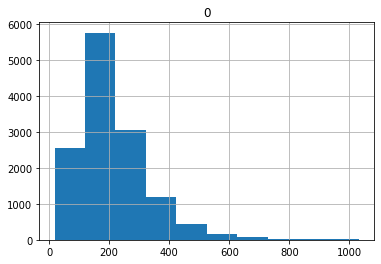

In [35]:
import matplotlib.pyplot as plt

pd.DataFrame(termos).hist()
plt.show()

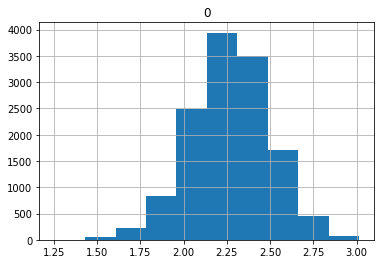

In [39]:
import numpy as np

np.log10(pd.DataFrame(termos)).hist()
plt.show()

In [40]:
df.loc[0,'EXCERTO_LEMATIZADO']

'voto : cuidar o auto de tomada de conta especial instaurar por o gerência executivo de o instituto nacional de o seguro social em juazeiro de o norte XXUF , em desfavor de o exemplo servir XXOMISSIS e de o senhor XXOMISSIS , em o condição de segurado de o inss , em decorrência de fraude em o concessão de benefício previdenciários . XXSALTO XXSECAO assistir razão a o unidade técnico . o jurisprudência de este corte ser firme em o sentido de que , não ter ser comprovar o participação de o beneficiário em o concessão regular , por meio de o proceder interno de apurar adotar por o autarquia , não ser possível concluir por o existência de conluio entre este e o exemplo servir que autorizar o concessão , dever , pois , ser afastar a responsabilidade de o segurado . poder ser mencionar em esse mesmo linha o recente acórdãosXXNUMERACAO , XXNUMERACAO , XXNUMERACAO eXXNUMERACAO , todo de o plenário . XXSALTO XXSECAO por fim , em o linha de o jurisprudência de este corte , cumprir comunicar a o 

In [41]:
len(df.loc[0,'EXCERTO_LEMATIZADO'])

2425

In [43]:
len(df.loc[0,'EXCERTO_LEMATIZADO'].split())

455

In [44]:
vetorizador.get_feature_names()[-20:]

['órgaõs',
 'órgão',
 'órion',
 'órteses',
 'ósseo',
 'ótica',
 'ótico',
 'ótimo',
 'óu',
 'óxido',
 'ôes',
 'ônibus',
 'ônus',
 'ões',
 'último',
 'úmida',
 'único',
 'únicosecretaria',
 'únicoxxnumero',
 'útil']

In [82]:
vetorizador.vocabulary_['árvore'], vetorizador.vocabulary_['azul'], vetorizador.vocabulary_['licitação']

(26447, 2462, 14933)

In [83]:
'árvore' in vetorizador.vocabulary_, '.' in vetorizador.vocabulary_

(True, False)

In [84]:
qtde = 0
for termo in df.loc[0,'EXCERTO_LEMATIZADO'].split():
    if termo in vetorizador.vocabulary_:
        qtde += 1
qtde

280

In [85]:
indices = []
excerto = []
for termo in df.loc[0,'EXCERTO_LEMATIZADO'].split():
    if termo in vetorizador.vocabulary_:
        indices.append(vetorizador.vocabulary_[termo])
        excerto.append(termo)
len(indices)

280

In [86]:
excerto[:20]

['voto',
 'cuidar',
 'auto',
 'de',
 'tomada',
 'de',
 'conta',
 'especial',
 'instaurar',
 'por',
 'gerência',
 'executivo',
 'de',
 'instituto',
 'nacional',
 'de',
 'seguro',
 'social',
 'em',
 'juazeiro']

In [87]:
indices[:20]

[25600,
 6252,
 2289,
 6538,
 24265,
 6538,
 5434,
 9387,
 13429,
 18856,
 11400,
 9856,
 6538,
 13445,
 16588,
 6538,
 22116,
 22918,
 8659,
 14323]

In [88]:
tf_idf = []
for indice in indices:
    tf_idf.append(matriz_densa[0,indice])
tf_idf[:20]

[0.014889860904663283,
 0.04436238974338144,
 0.02387491977974392,
 0.5338759649048965,
 0.037161182685269,
 0.5338759649048965,
 0.04261585214792966,
 0.028334071047535624,
 0.03867221573655871,
 0.0671779920827961,
 0.0656723125911437,
 0.04518175490527546,
 0.5338759649048965,
 0.1298325530251248,
 0.09093987750606777,
 0.5338759649048965,
 0.17590568151857727,
 0.11822841306327384,
 0.1825737395915758,
 0.10542840433809403]

In [89]:
len(tf_idf)

280

In [90]:
np.mean(tf_idf)

0.14242705012435508

In [91]:
minimo = np.percentile(tf_idf,100*180/280)
minimo

0.09563453770833151

In [92]:
sum(tf_idf > minimo)

100

In [93]:
tf_idf > minimo

array([False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
        True, False, False, False,  True,  True, False,  True,  True,
        True,  True,

In [140]:
tamanho_desejado = 150
texto_derivado = ''
tamanho_original = len(tf_idf)
if tamanho_desejado >= tamanho_original:
    minimo = 0
else:
    minimo = np.percentile(tf_idf,100-100*tamanho_desejado/tamanho_original)
print(minimo)
for indice, valor in enumerate(tf_idf):
    if valor > minimo:
        texto_derivado += excerto[indice] + ' '
texto_derivado[:-1]

0.06462383698293411


'de de por gerência de instituto nacional de seguro social em juazeiro de em de de senhor em de segurado de inss em de em concessão de previdenciários de ser em de que não ser de beneficiário em concessão por de de por não ser por de conluio que concessão ser de segurado ser em linha de por em linha de de comunicar instituto nacional de seguro social inss procuradoria pgf que não inclusão de beneficiário em relação processual não impedir adoção de providência judiciais reaver que eventual indevido pagos de relação processual senhor em incisar incisar alínea incisar de de senhor em de de de de de que de de inss em de incisar alínea de incisar alínea de de comunicar instituto nacional de seguro social inss procuradoria pgf que não inclusão de beneficiário em relação processual não impedir adoção de providência judiciais reaver que eventual indevido pagos'

KeyError: 'o'

In [103]:
 vetorizador.vocabulary_['processual']

19636

In [110]:
idfs = np.asarray(vetorizador.idf_)
idfs

array([7.8554088 , 3.14974707, 9.39585384, ..., 7.23636959, 9.80131895,
       8.70270666])